Epoch: 0 Loss: 0.28014363590911784
Epoch: 1000 Loss: 0.24971731456941582
Epoch: 2000 Loss: 0.24834256246704572
Epoch: 3000 Loss: 0.2351732079632958
Epoch: 4000 Loss: 0.18761745745277097
Epoch: 5000 Loss: 0.11376191085651663
Epoch: 6000 Loss: 0.02848272524800015
Epoch: 7000 Loss: 0.012042153641357235
Epoch: 8000 Loss: 0.0071629107762606736
Epoch: 9000 Loss: 0.004983407119855729

Final Output (Rounded):
[[0.]
 [1.]
 [1.]
 [0.]]

XOR Truth Table (Predicted):
0 XOR 0 = 0
0 XOR 1 = 1
1 XOR 0 = 1
1 XOR 1 = 0


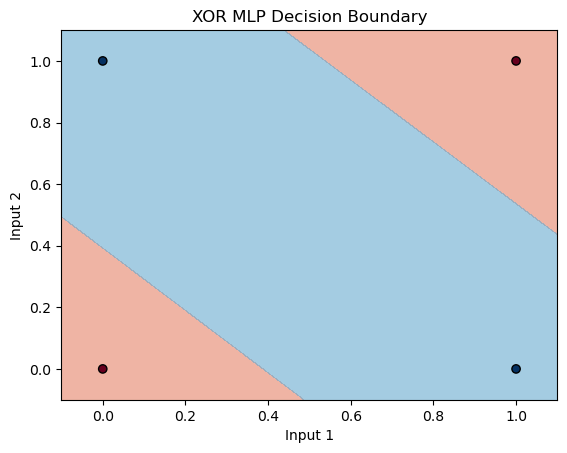

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [0]])

np.random.seed(1)
input_to_hidden_weights = np.random.rand(2, 2)
hidden_bias = np.random.rand(1, 2)
hidden_to_output_weights = np.random.rand(2, 1)
output_bias = np.random.rand(1, 1)

lr = 0.1
epochs = 10000

for i in range(epochs):
    hidden_layer_input = np.dot(X, input_to_hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)

    final_input = np.dot(hidden_layer_output, hidden_to_output_weights) + output_bias
    final_output = sigmoid(final_input)

    loss = Y - final_output

    d_output = loss * sigmoid_derivative(final_output)
    d_hidden = d_output.dot(hidden_to_output_weights.T) * sigmoid_derivative(hidden_layer_output)

    hidden_to_output_weights += hidden_layer_output.T.dot(d_output) * lr
    output_bias += np.sum(d_output, axis=0, keepdims=True) * lr

    input_to_hidden_weights += X.T.dot(d_hidden) * lr
    hidden_bias += np.sum(d_hidden, axis=0, keepdims=True) * lr

    if i % 1000 == 0:
        print("Epoch:", i, "Loss:", np.mean(np.square(loss)))

# Final output after training
print("\nFinal Output (Rounded):")
rounded_output = np.round(final_output)
print(rounded_output)

print("\nXOR Truth Table (Predicted):")
for i in range(len(X)):
    x1, x2 = X[i]
    pred = int(rounded_output[i][0])
    print(f"{int(x1)} XOR {int(x2)} = {pred}")

# Plot decision boundary
def plot_boundary():
    h = 0.01
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    hidden = sigmoid(np.dot(grid, input_to_hidden_weights) + hidden_bias)
    output = sigmoid(np.dot(hidden, hidden_to_output_weights) + output_bias)
    output = output.reshape(xx.shape)

    plt.contourf(xx, yy, output, levels=[0, 0.5, 1], cmap=plt.cm.RdBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), edgecolors='k', cmap=plt.cm.RdBu)
    plt.title("XOR MLP Decision Boundary")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

plot_boundary()
